In [5]:
# Loading required libraries
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 as cv

In [23]:
img1 = cv.imread("goldhill.bmp", cv.IMREAD_GRAYSCALE) 
img2 = cv.imread("peppers.tif")

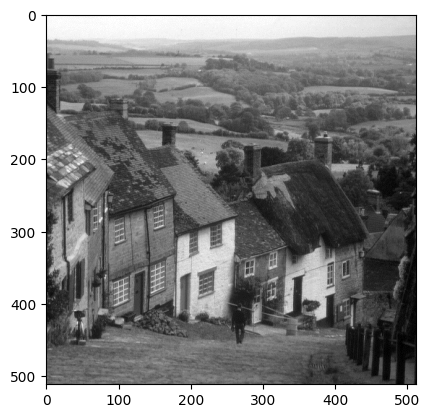

In [24]:
plt.imshow(img1, cmap= "gray")

In [25]:

# Change color to RGB (from BGR) 
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) 

(512, 512, 3)

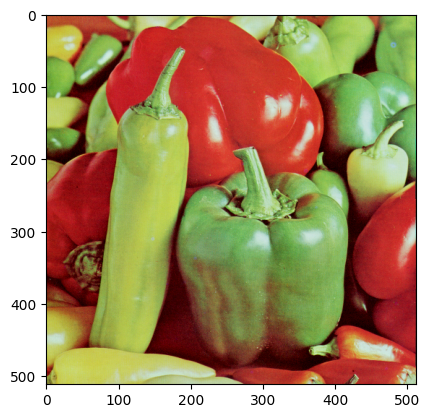

In [26]:
plt.imshow(img2)
img2.shape

In [27]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB) 
pixel_vals = img2.reshape((-1,3)) # numpy reshape operation -1 unspecified 
print(pixel_vals.shape)
# Convert to float type only for supporting cv2.kmean
pixel_vals = np.float32(pixel_vals)

(262144, 3)


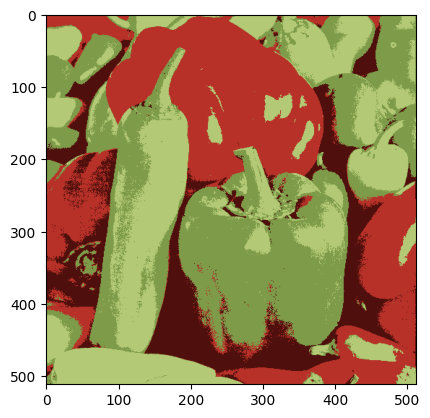

In [31]:
#criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.85) 
  
# Choosing number of cluster
k = 4

retval, labels, centers = cv.kmeans(pixel_vals, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS) 
  
# convert data into 8-bit values 
centers = np.uint8(centers) 

segmented_data = centers[labels.flatten()] # Mapping labels to center points( RGB Value)

# reshape data into the original image dimensions 
segmented_image = segmented_data.reshape((img2.shape)) 
  
plt.imshow(segmented_image)